In [1]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, SVR
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, \
RocCurveDisplay, roc_auc_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier

Glass Dataset


In [2]:
glass = pd.read_csv("Cases/Glass_Identification/Glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [3]:
X, y = glass.drop("Type", axis = 1), glass["Type"] 

In [5]:
from sklearn.compose import ColumnTransformer, make_column_selector

ohe = OneHotEncoder(drop='first',sparse_output=False).set_output(transform='pandas')

col_trnf = ColumnTransformer([
                                ('OHE', ohe, make_column_selector(dtype_include=object))],
                              remainder='passthrough', verbose_feature_names_out=False)

col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


features = [2,3,4,5]
n_est = [25, 50, 100, 150, 200]
scores = []

for f in features:
    for n in n_est:
        rf = RandomForestClassifier(random_state = 25, max_features=f, n_estimators=n)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([f,n, accuracy_score(y_test, y_pred)])

df_scores = pd.DataFrame(data = scores, columns = ['No. of Features', 'No of Estimators', 'Accuracy Score'])
df_scores.sort_values('Accuracy Score', ascending=False)

,No. of Features,No of Estimators,Accuracy Score
14,4,200,0.830769
8,3,150,0.815385
6,3,50,0.815385
11,4,50,0.815385
16,5,50,0.815385
17,5,100,0.815385
18,5,150,0.815385
19,5,200,0.815385
5,3,25,0.800000
13,4,150,0.800000


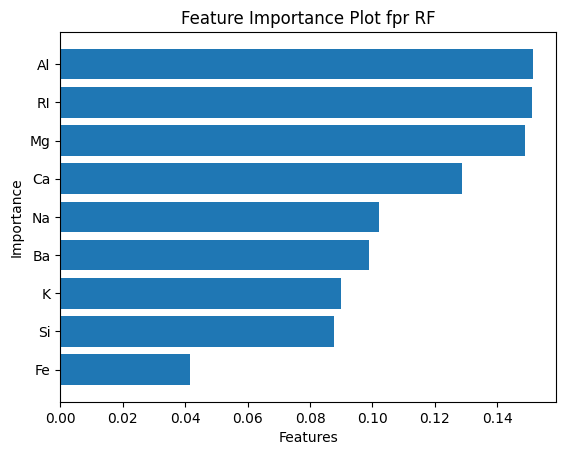

In [8]:
from sklearn.ensemble import RandomForestClassifier


best_model = RandomForestClassifier(random_state = 25, max_features = 3, n_estimators = 150)
best_model.fit(X, y)
df_imp = pd.DataFrame({"Feature": list(X.columns), 'Importance': best_model.feature_importances_})
df_imp = df_imp.sort_values("Importance")
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Plot fpr RF")
plt.show()

Conctete Dataset


In [10]:
concrete = pd.read_csv("Cases/Concrete_Strength/Concrete_data.csv")
concrete

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [11]:
X, y = concrete.drop("Strength", axis=1), concrete["Strength"]

In [ ]:
X_train, X_test, y_train, y_test = 